In [6]:
!pip install numpy matplotlib

  Using cached https://files.pythonhosted.org/packages/00/4a/e34fce8f18c0e052c2b49f1b3713469d855f7662d58ae2b82a88341e865b/numpy-1.17.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
     |████████████████████████████████| 92kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 23.0MB/s eta 0:00:01


In [7]:
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt
# а можно импортировать numpy и писать: numpy.fft.rfft

In [8]:
FD = 22050 # частота дискретизации, отсчётов в секунду
# а это значит, что в дискретном сигнале представлены частоты от нуля до 11025 Гц (это и есть теорема Котельникова)
N = 2000 # длина входного массива, 0.091 секунд при такой частоте дискретизации
# сгенерируем сигнал с частотой 440 Гц длиной N
pure_sig = array([6.*sin(2.*pi*440.0*t/FD) for t in range(N)])
# сгенерируем шум, тоже длиной N (это важно!)
noise = uniform(-50.,50., N)
# суммируем их и добавим постоянную составляющую 2 мВ (допустим, не очень хороший микрофон попался. Или звуковая карта или АЦП)
sig = pure_sig + noise + 2.0 # в numpy так перегружена функция сложения
# вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft, это быстрее, чем fft
spectrum = rfft(sig)

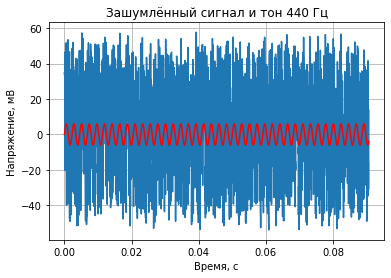

In [9]:
# нарисуем всё это, используя matplotlib
# Сначала сигнал зашумлённый и тон отдельно
plt.plot(arange(N)/float(FD), sig) # по оси времени секунды!
plt.plot(arange(N)/float(FD), pure_sig, 'r') # чистый сигнал будет нарисован красным
plt.xlabel(u'Время, c') # это всё запускалось в Python 2.7, поэтому юникодовские строки
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Зашумлённый сигнал и тон 440 Гц')
plt.grid(True)
plt.show()

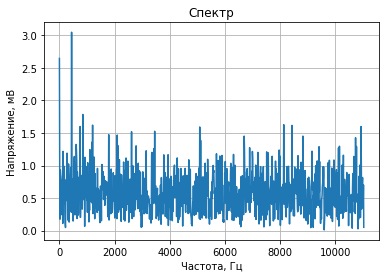

In [16]:
# когда закроется этот график, откроется следующий
# Потом спектр
plt.plot(rfftfreq(N, 1./FD), np_abs(spectrum)/N)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в герцы
# нас интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы амплитуды были в милливольтах, а не в суммах Фурье. Проверить просто — постоянные составляющие должны совпадать в сгенерированном сигнале и в спектре
plt.xlabel(u'Частота, Гц')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

# Example 2

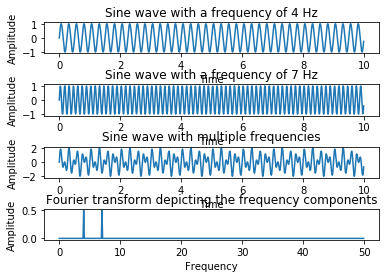

In [17]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 10; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot

figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=1)

 

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')

axis[0].plot(time, amplitude1)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('Amplitude')

 

 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')

axis[1].plot(time, amplitude2)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('Amplitude')

 

# Add the sine waves

amplitude = amplitude1 + amplitude2

 

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')

axis[2].plot(time, amplitude)

axis[2].set_xlabel('Time')

axis[2].set_ylabel('Amplitude')

 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')

 

axis[3].plot(frequencies, abs(fourierTransform))

axis[3].set_xlabel('Frequency')

axis[3].set_ylabel('Amplitude')

 

plotter.show()

# Example 3

jupyter notebook on github site [Understanding the FFT](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)